In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
path = 'C:\\Users\\user\\Desktop\\python\\'

In [3]:
df_betfair = pd.read_csv(path + 'betfair_clean.csv')
df_betfair.EVENT_DT = pd.to_datetime(df_betfair.EVENT_DT).dt.normalize()

In [9]:
columns = ['Date','Country','Track','Going','Type','Distance','Class','Time','Stall','Horse','OR','Age','Pace','Weight',
'Jockey','Trainer','Head Gear','SP Fav','Industry SP','Betfair SP','IP Min','IP Max','Pre Min','Pre Max',
'Pred Industry SP','Place','Winning Distance','Runners','SP Win Return','E/W return','BF Win Return','minus',
'plus','percentage_minus','percentage_plus']

df = pd.read_csv(path + 'horses_clean.csv', index_col = 0)
df.columns = columns

In [10]:
df.head()

,Date,Country,Track,Going,Type,Distance,Class,Time,Stall,Horse,...,Place,Winning Distance,Runners,SP Win Return,E/W return,BF Win Return,minus,plus,percentage_minus,percentage_plus
0,2010-02-20,GB,ASCOT,GTS,Hurdle,2m3½f,3.0,1:40pm,NaN,FINIANS RAINBOW,...,1,NaN,7,3.64,0.91,3.7,-,1,-,2.6
1,2010-02-20,GB,ASCOT,GTS,Hurdle,2m3½f,3.0,1:40pm,NaN,SERETH,...,4,NaN,7,-10.00,-10.00,-10.0,12,-,29.6,-
2,2010-02-20,GB,ASCOT,GTS,Hurdle,2m3½f,3.0,1:40pm,NaN,SPIRIT OF ADJISA,...,3,NaN,7,-10.00,-10.00,-10.0,1,-,5.0,-
3,2010-02-20,GB,ASCOT,GTS,Hurdle,2m3½f,3.0,1:40pm,NaN,ARKOSE,...,2,NaN,7,-10.00,35.00,-10.0,4,-,11.8,-
4,2010-02-20,GB,ASCOT,GTS,Hurdle,2m3½f,3.0,1:40pm,NaN,PRIORS GLEN,...,5,NaN,7,-10.00,-10.00,-10.0,3,-,13.7,-


In [38]:
df_betfair.head()

,Unnamed: 0,EVENT_ID,MENU_HINT,EVENT_NAME,EVENT_DT,SELECTION_ID,SELECTION_NAME,WIN_LOSE,BSP,PPWAP,MORNINGWAP,PPMAX,PPMIN,IPMAX,IPMIN,MORNINGTRADEDVOL,PPTRADEDVOL
0,0,100288413,GB / Ling 31st Dec,TO BE PLACED,2008-12-31,3088522,TODAYS THE DAY,1,1.923213,1.889773,1.775000,2.06,1.73,2.48,1.01,3535.68,32817.50
1,1,100288413,GB / Ling 31st Dec,TO BE PLACED,2008-12-31,3145993,MRS SLOCOMBE,0,6.744370,6.107431,5.500556,7.20,4.50,1.00,1001.00,377.26,4639.42
2,2,100288413,GB / Ling 31st Dec,TO BE PLACED,2008-12-31,3264548,LUJEANIE,0,3.650000,3.692947,3.946839,4.50,3.10,1.00,1001.00,874.22,9822.60
3,3,100288413,GB / Ling 31st Dec,TO BE PLACED,2008-12-31,3284421,JAQS SISTER,0,32.000000,20.488614,12.684645,36.00,13.50,1000.00,30.00,210.20,1373.42
4,4,100288413,GB / Ling 31st Dec,TO BE PLACED,2008-12-31,3351454,DIMANDER,1,1.310552,1.374122,1.366663,1.48,1.30,1.10,1.01,5628.88,66106.26


##### Let's check random horse and make sure that our data matches official Betfair platform and it does! Good! 
PS: Compare BSP in betfair table with BETFAIR SP in second table for the same races 

In [46]:
horse = 'CAPTAIN SCOOBY'
df_betfair.loc[df_betfair['SELECTION_NAME'] == horse].sort_values(['EVENT_DT']).tail(10)

,Unnamed: 0,EVENT_ID,MENU_HINT,EVENT_NAME,EVENT_DT,SELECTION_ID,SELECTION_NAME,WIN_LOSE,BSP,PPWAP,MORNINGWAP,PPMAX,PPMIN,IPMAX,IPMIN,MORNINGTRADEDVOL,PPTRADEDVOL
1638319,749,138019911,GB / Newc 16th Dec,5f Hcap,2017-12-16,3066560,CAPTAIN SCOOBY,0,47.156418,31.359376,22.425360,50.0,15.0,1000.0,55.0,525.44,10143.98
1818336,27,138254645,GB / ChelmC 21st Dec,Without Olaudah,2017-12-21,3066560,CAPTAIN SCOOBY,0,NaN,1.000000,1.000000,1.0,1001.0,1.0,1001.0,0.00,0.00
1818440,131,138185268,GB / ChelmC 21st Dec,6f Hcap,2017-12-21,3066560,CAPTAIN SCOOBY,0,40.000000,34.648056,31.977926,50.0,18.0,1000.0,21.0,72.88,11924.54
1854256,441,138214771,GB / Wolv 22nd Dec,5f Hcap,2017-12-22,3066560,CAPTAIN SCOOBY,0,7.320686,7.895965,25.690639,26.0,6.6,1000.0,7.2,70.10,45834.48
1854278,463,138279005,GB / Wolv 22nd Dec,Without Frank The Barber,2017-12-22,3066560,CAPTAIN SCOOBY,0,NaN,1.000000,1.000000,1.0,1001.0,1.0,1001.0,0.00,0.00
1185940,433,138589459,GB / ChelmC 4th Jan,Without Jorvik Prince,2018-04-01,3066560,CAPTAIN SCOOBY,0,NaN,1.000000,1.000000,1.0,1001.0,1.0,1001.0,0.00,0.00
1186403,896,138525050,GB / ChelmC 4th Jan,5f Hcap,2018-04-01,3066560,CAPTAIN SCOOBY,0,25.102438,22.471628,8.004798,29.0,4.0,1000.0,20.0,823.08,13314.28
1220303,167,138613914,GB / Sthl 5th Jan,Without Declamation,2018-05-01,3066560,CAPTAIN SCOOBY,0,NaN,1.000000,1.000000,1.0,1001.0,1.0,1001.0,0.00,0.00
1220300,164,138549154,GB / Sthl 5th Jan,6f Hcap,2018-05-01,3066560,CAPTAIN SCOOBY,0,78.585006,45.154522,24.903274,80.0,24.0,1000.0,65.0,116.20,9655.20
1426429,194,138745245,GB / ChelmC 11th Jan,6f Hcap,2018-11-01,3066560,CAPTAIN SCOOBY,0,19.000000,22.677087,21.463143,32.0,16.5,1000.0,8.6,169.32,12649.96


In [43]:
df.loc[df['Horse'] == horse].sort_values(['Date']).tail(10)[['Date', 'Track','Betfair SP', 'SP Fav','Industry SP', 'Place']]

,Date,Track,Betfair SP,SP Fav,Industry SP,Place
13393,2017-11-03,NEWCASTLE,14.00,5,11.0,5
15296,2017-11-07,REDCAR,33.70,8,21.0,9
12728,2017-12-06,NEWCASTLE,27.00,7,21.0,5
5299,2017-12-14,GREAT LEIGHS,13.31,7,12.0,7
12653,2017-12-16,NEWCASTLE,47.16,8,29.0,8
5155,2017-12-21,GREAT LEIGHS,40.00,6,17.0,7
19950,2017-12-22,WOLVERHAMPTON,7.32,4,6.5,5
4247,2018-01-04,GREAT LEIGHS,25.10,5,15.0,9
12878,2018-01-05,SOUTHWELL,78.59,7,26.0,5
4202,2018-01-11,GREAT LEIGHS,19.00,7,15.0,7


In [76]:
def get_pct(price):
    horse_pct = df_betfair.groupby(['EVENT_ID', 'SELECTION_NAME'])[price].sum()
    horse_pct = horse_pct.groupby(['SELECTION_NAME']).mean()
    
    return horse_pct

horse_ppwap_pct = get_pct('PPWAP')
horse_bsp_pct = get_pct('BSP')

horse_win_sum = df_betfair.groupby(['SELECTION_NAME'])['WIN_LOSE'].sum()
horse_race_sum = df_betfair.groupby(['SELECTION_NAME'])['WIN_LOSE'].count()
horse_win_pct = horse_win_sum/horse_race_sum

# Only pick horses with 20 races or more
horses_shortlist = horse_race_sum.loc[horse_race_sum > 20].keys()
temp = pd.DataFrame([horse_win_pct.loc[horses_shortlist], horse_ppwap_pct.loc[horses_shortlist]]).T
temp2 = pd.DataFrame([horse_win_pct.loc[horses_shortlist], horse_bsp_pct.loc[horses_shortlist]]).T

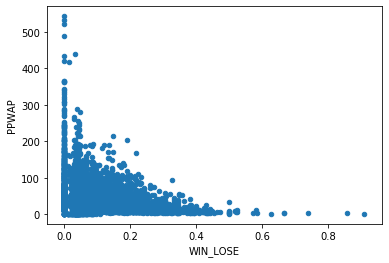

In [77]:
temp.plot.scatter('WIN_LOSE', 'PPWAP')

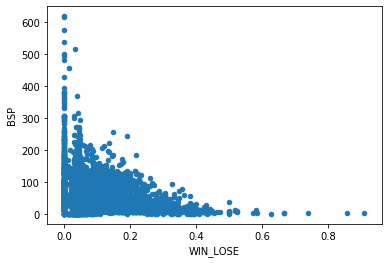

In [78]:
temp2.plot.scatter('WIN_LOSE', 'BSP')